In [ ]:
!pip install plotly --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 65.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [1]:
#importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Explorando os dados
#PREVER O ATRIBUTO DEFAULT (NÃO PAGOU OU PAGOU O EMPRESTIMO)
#0 PAGOU 1 N PAGOU

base =  pd.read_csv('/content/credit_data.csv')

In [ ]:
base

# clientid é um atributo categórico nominal
# income é a renda anual, é um atributo numerica continua
# age é a idade, é um atributo numerico continuo
# loan é a divida, é numerica continua

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
#visualizar os primeiros
base.head()
#visualiazr e ultimos
base.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [ ]:
#visualizar a descrição do dataset
base.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
#pegando a pessoa que mais recebe
base[base['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [ ]:
base[base['loan'] <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


<Axes: xlabel='default', ylabel='count'>

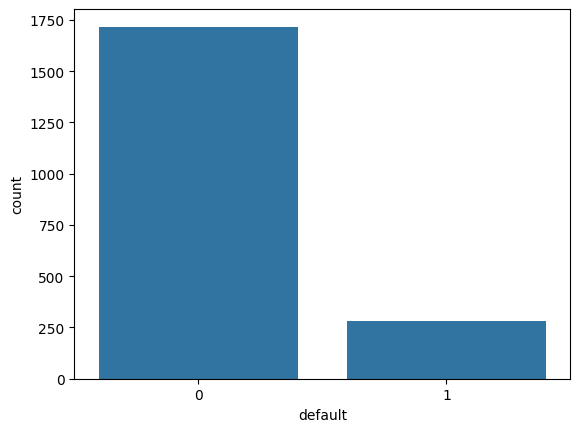

In [ ]:
#saber os valores possiveis e suas contagens
np.unique(base['default'], return_counts=True)


#gerando grafico de contagem, distribuição dos valores
sns.countplot(x=base['default'])

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

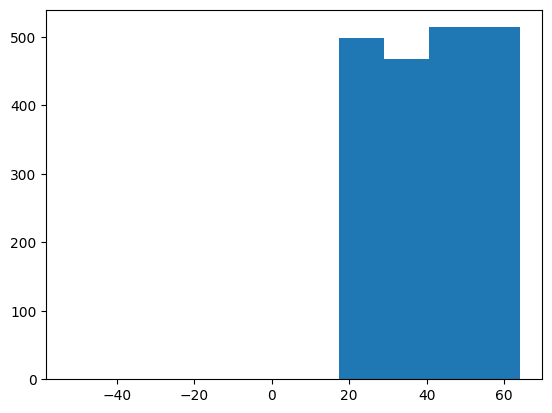

In [ ]:
#gerando um histograma da frequencia das idades no dataset
plt.hist(x=base['age'])

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

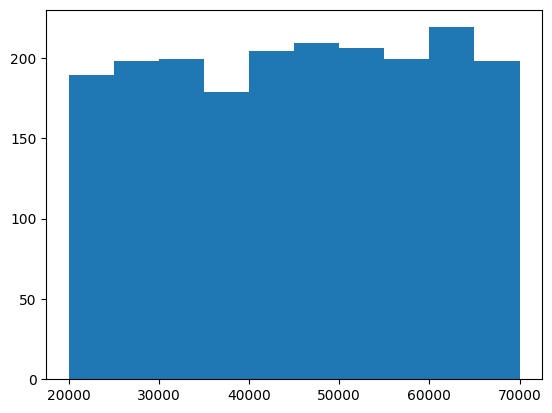

In [ ]:
#gerando um histograma da frequencia dos salários

plt.hist(x=base['income'])

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

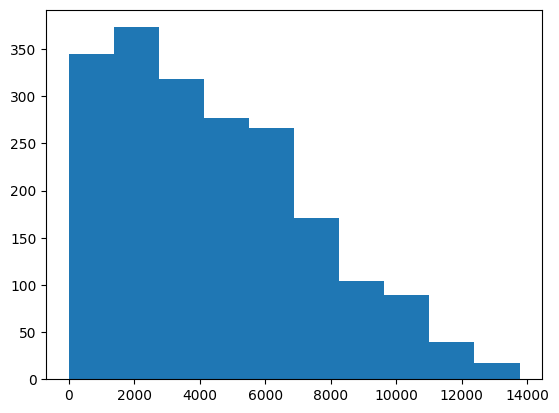

In [ ]:
#histograma de frequencia das dividas
plt.hist(x = base['loan'])

In [ ]:
#combinando atributos para visualização dinamica
grafico = px.scatter_matrix(base, dimensions = ['age', 'income','loan'], color='default')
grafico.show()

In [ ]:
#Tratamento de dados inconsistentes

#buscando os dados inconcisos
base.loc[base['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
#MÉTODOS PARA LIDAR COM ISSO
# 1 APAGAR A COLUNA (SOMENTE SE A GRANDE MAIORIA DOS REGISTROS ESTIVEM EM RUIDO)
# INVIÁVEL NESSE CASO !!
# EXEMPLO

baseSemColuna = base

# parametro 1 é para colunas
baseSemColuna = baseSemColuna.drop('age', 1)
baseSemColuna

<ipython-input-15-fcbc281a6d74>:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [ ]:
# 2 MÉTODO - APAGAR AS LINHAS COM VALORES INCONSISTENTES

baseSemRegistro = base

baseSemRegistro = baseSemRegistro.drop(baseSemRegistro[baseSemRegistro['age'] < 0].index)
baseSemRegistro


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
# 3 MÉTODO - SUBSTITUIR VALORES INCONSISTENTES POR VALORES VALIDOS MANUALMENTE
# OU SEJA, TENTAR DE ALGUMA FORMA INTERAGIR COM O CRIADOR/DONO DO REGISTRO E PEDIR
# UMA ATUALIZAÇÃO. INVIÁVEL PARA MUITOS DADOS


In [ ]:
# 4 MÉTODO - SUBSTITUIR OS VALORES ERRADOS PELA MÉDIA DA COLUNA
# MÉTODO BOM PARA MUITOS DADOS

#descobrindo a média somente sobre os registros com valores corretos
mediaIdades = base['age'][base['age'] > 0].mean()

base.loc[base['age'] < 0, 'age'] = mediaIdades

base.head(27)


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [ ]:
# TRATANDO VALORES FALTANTES DOS REGISTROS

#verificando os valores faltantes
# Se tiver FALSE,  não falta
# Se tiver TRUE, existe a falta de valor
base.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [ ]:
#VENDO A QUANTIDADE TOTAL DE NULOS POR COLUNA
base.isnull().sum()


clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
base.loc[pd.isnull(base['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
#COLOCANDO A MÉDIA NOS VALORES NULOS

base['age'].fillna(mediaIdades, inplace=True)
base.loc[pd.isnull(base['age'])]

,clientid,income,age,loan,default


In [ ]:
base.loc[base['clientid'].isin([29,31,32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [ ]:
#COM O DATASET ARRUMADO, DIVIDIR ATRIBUTOS PREVISORES E CLASSIFICADORES
# NORMALMENTE É x PARA PREVISORES
# E y PARA CLASSIFICADORES

# : para todas as linhas
# 1:4 para as colunas de index iniciando e incluindo 1 até a coluna 4 mas não incluindo o 4
# .values é o atributo que retorna valores em formato numpy
X = base.iloc[:,1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
Y = base.iloc[:, 4].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#ESCALONANDO ATRIBUTOS
#ESCALONAMENTO É QUANDO TEMOS VALORES DE ESCALAS MUITO DIFERENTES
#ISSO PODE OCASIONAR QUE ATRIBUTOS COM VALORES MAIORES PODEM TER MAIOR PESO
#SÓ DEVIDO A ISSO, PORTANTO, TEMOS QUE PADRONIZAR TODOS OS ATRIBUTOS EM UMA
#MESMA ESCALA

#ACESSAMOS O MENOR E O MAIOR VALOR DA PRIMEIRA COLUNA DE x QUE É O INCOME

X[:,0].min(),X[:,1].min(),X[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [ ]:
X[:,0].max(), X[:,1].max(), X[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [ ]:
# PARA ESCALONAR PODE OPTAR POR DOIS MÉTODOS
# STANDARDISATION - INDICADO QUANTO SE TEM OUTLIERS, UTILIZANDO DESVIO PADRÃO
# NORMALIZATION - MÉTODO SEM DESVIO PADRÃO

from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()

X = escalador.fit_transform(X)

#Para descalonar, usar .inverse_transform(dados_escalonados)

#Comparando com os valores gerados

X[:,0].min(),X[:,1].min(),X[:,2].min()

(-1.7676158019964077, -1.7264154144794286, -1.4592791099462408)

In [ ]:
#MEXENDO COM A BASE DE DADOS DO CENSO

In [ ]:
baseCensos = pd.read_csv('/content/census.csv')

In [ ]:
baseCensos

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['final-weight'].plot(kind='hist', bins=20, title='final-weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['education-num'].plot(kind='hist', bins=20, title='education-num')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('marital-status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='age', y='final-weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='final-weight', y='education-num', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='education-num', y='capital-gain', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('marital-status')):
  _plot_series(series, series_name, i)
  fig.legend(title='marital-status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('relationship')):
  _plot_series(series, series_name, i)
  fig.legend(title='relationship', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('race')):
  _plot_series(series, series_name, i)
  fig.legend(title='race', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['final-weight'].plot(kind='line', figsize=(8, 4), title='final-weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['education-num'].plot(kind='line', figsize=(8, 4), title='education-num')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['relationship'].value_counts()
    for x_label, grp in _df_20.groupby('marital-status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital-status')
_ = plt.ylabel('relationship')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['race'].value_counts()
    for x_label, grp in _df_21.groupby('relationship')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('relationship')
_ = plt.ylabel('race')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sex'].value_counts()
    for x_label, grp in _df_22.groupby('race')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('race')
_ = plt.ylabel('sex')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['income'].value_counts()
    for x_label, grp in _df_23.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('income')

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['marital-status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='marital-status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['relationship'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='relationship', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['race'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='race', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='index', y='sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
#Age = variavel numerica discreta
#Workclass = variavel categorica nominal
#FinalWeiths = varival numerica continua (Por ter uma faixa de valores alta)
#Education = variavel categorica ordinal
#EducationNum = variavel numerica discreta (pequena faixa de valores)
#Marital-status = variavel categorica nominal
#Occupation = variavel categorica nominal
#relationship = variavel categorica nominal
#race = variavel categorica nominal
#sex = variavel categorica nominal
#Capital-gain = variavel numerico continua
#Capital-loss = variavel numerico continua
#hour-per-week = variavel numerica discreta
#native-country = variavel categorica nominal
#income = variavel categorica (STRING) ordinal (ALVO)

In [ ]:
baseCensos.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
baseCensos.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
#Vendo a quantidade de classes para um atributo em específico
# MENOR Q 50K E MAIOR QUE 50K
np.unique(baseCensos['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<Axes: xlabel='income', ylabel='count'>

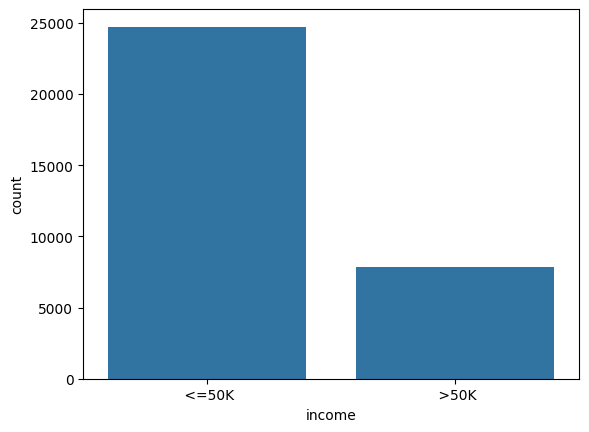

In [ ]:
#Vendo a distribuição desbalanceada
sns.countplot(x=baseCensos['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

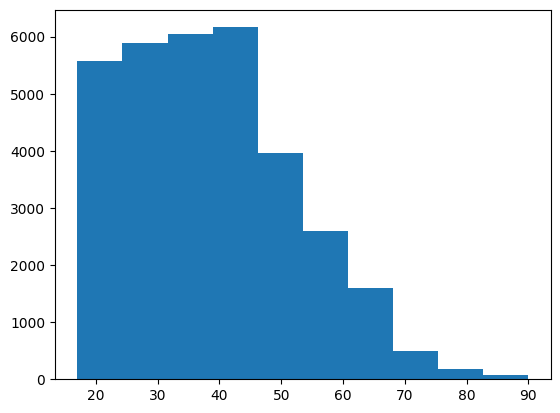

In [ ]:
plt.hist(x= baseCensos['age'])


(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

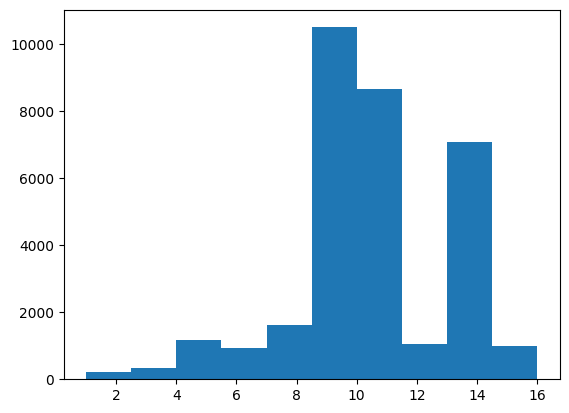

In [ ]:
plt.hist(x = baseCensos['education-num'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

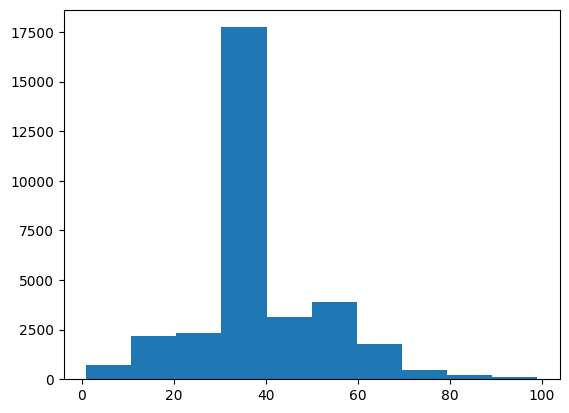

In [ ]:
plt.hist(x = baseCensos['hour-per-week'])

In [ ]:
grafico = px.treemap(baseCensos, path=['workclass', 'age'])
grafico.show()

In [ ]:
grafico = px.treemap(baseCensos, path=['occupation', 'relationship', 'age'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(baseCensos, dimensions=['occupation','relationship']) #podemos colocar vários atributos e ver as relações
grafico.show()

In [ ]:
baseCensos.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
#DIVIDINDO PREVISORES E CLASSES

#PREVISORES

X_census = baseCensos.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
X_census[:, 1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [ ]:
# CLASSES ALVO

Y_census = baseCensos.iloc[:,14].values
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
#TRANSFORMAÇÃO DOS ATRIBUTOS CATEGÓRICOS (string) em Dados numéricos representativos

#LabelEncoder
from sklearn.preprocessing import LabelEncoder

labelEncoderTeste = LabelEncoder()
#Pegando os dados na coluna Workclass (segunda coluna)
teste = labelEncoderTeste.fit_transform(X_census[:,1])

In [ ]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
#FAZENDO O ENCODER PARA TODOS
labelEncoderWork = LabelEncoder()
labelEncoderEducation = LabelEncoder()
labelEncoderMarital = LabelEncoder()
labelEncoderOccupation = LabelEncoder()
labelEncoderRelationship = LabelEncoder()
labelEncoderRace = LabelEncoder()
labelEncoderSex = LabelEncoder()
labelEncoderCountry = LabelEncoder()

In [ ]:
X_census[:,1] = labelEncoderWork.fit_transform(X_census[:,1])
X_census[:,3] = labelEncoderEducation.fit_transform(X_census[:,3])
X_census[:,5] = labelEncoderMarital.fit_transform(X_census[:,5])
X_census[:,6] = labelEncoderOccupation.fit_transform(X_census[:,6])
X_census[:,7] = labelEncoderRelationship.fit_transform(X_census[:,7])
X_census[:,8] = labelEncoderRace.fit_transform(X_census[:,8])
X_census[:,9] = labelEncoderSex.fit_transform(X_census[:,9])
X_census[:,13] = labelEncoderCountry.fit_transform(X_census[:,13])

In [ ]:
#Verificando a transformação

X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [ ]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
#USANDO O OneHotEncoder
#ELE É USADO PARA EVITAR QUE VALORES ALTOS DENTRO DE UMA COLUNA, SEJA CONSIDERADO COMO MAIOR RELEVANCIA PARA A CLASSIFICAÇÃO

#Solução exemplo
#Carro

# Gol Palio Uno
# 1   2     3

# DE FORMA QUE FIQUE CODIFICADO

#Gol    1 0 0
#Paulio 0 1 0
#Uno    0 0 1 #encode


#PEGANDO NA COLUNA WORKCLASS, QUAIS SÃO OS VALORES POSSÍVEIS
#NO CASO, SÃO 9, PORTANTO, COM O ONE HOT ENCODER, 9 NOVAS COLUNAS
len(np.unique(baseCensos['workclass']))

9

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#TRANSFORMANDO OS CATEGÓRICOS EM DIVERSAS COLUNAS CONFORME EXPLICADO ANTERIORMENTE
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13] )], remainder='passthrough')

In [ ]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X_census.shape

(32561, 108)

In [ ]:
#ESCALONAMENTO PARA DEIXAR NA MESMA ESCALA
# por exemplo, idade possui um range de valores bem menor que atributos com range maior

#STARDARDISATION
from sklearn.preprocessing import StandardScaler

scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [ ]:
#DIVIDINDO BASES DE TREINO E TESTE PARA A BASE DE CREDITO

from sklearn.model_selection import train_test_split

#X se refere ao atributos previsores
#Y se refere ao atributo alvo da classificação
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X, Y, test_size= 0.25, random_state=0)

In [ ]:
#Previsores de treinamento
X_credit_treinamento.shape

(1500, 3)

In [ ]:
#Classificador dos dados de treinamento PAGA OU NÃO PAGA
y_credit_treinamento.shape

(1500,)

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
#DIVIDINDO BASES DE TREINO E TESTE PARA A BASE DO CENSUS

X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, Y_census, test_size= 0.15, random_state=0)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
#SALVAR AS BASES DE TREINO e TESTE DO CRÉDITO

import pickle

with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)


In [ ]:
#SALVAR AS BASES DE TREINO e TESTE DO CENSUS

import pickle

with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento,X_census_teste, y_census_teste ], f)